# Movie Recommendation Model

## Content Based Filtering

### Step 1: EDA and Data Preprocessing
Here we will load the data and clean it for the recommendation system.

#### Import neccessary modules

In [606]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [607]:
# Load the movies metadata file
movies_df = pd.read_csv('movies_metadata.csv', low_memory=False)
# Display the data
movies_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [608]:
movies_df.describe(include='all')

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
count,45466,4494,45466,45466,7782,45466,45449,45455,45466,44512,...,45379,4.546000e+04,45203.000000,45460,45379,20412,45460,45460,45460.000000,45460.000000
unique,5,1698,1226,4069,7673,45436,45417,92,43373,44307,...,17336,NaN,NaN,1931,6,20283,42277,2,NaN,NaN
top,False,"{'id': 415931, 'name': 'The Bowery Boys', 'pos...",0,"[{'id': 18, 'name': 'Drama'}]",http://www.georgecarlin.com,141971,tt1180333,en,Hamlet,No overview found.,...,2008-01-01,NaN,NaN,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Based on a true story.,Cinderella,False,NaN,NaN
freq,45454,29,36573,5000,12,3,3,32269,8,133,...,136,NaN,NaN,22395,45014,7,11,45367,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.120935e+07,94.128199,NaN,NaN,NaN,NaN,NaN,5.618207,109.897338
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.433225e+07,38.407810,NaN,NaN,NaN,NaN,NaN,1.924216,491.310374
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000e+00,85.000000,NaN,NaN,NaN,NaN,NaN,5.000000,3.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000e+00,95.000000,NaN,NaN,NaN,NaN,NaN,6.000000,10.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000e+00,107.000000,NaN,NaN,NaN,NaN,NaN,6.800000,34.000000


In [609]:
# Check for missing values
movies_df.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

A few of the columns have missing values, but for the features

### Step 2: Feature Extraction
#### 2.1 Processing Genres
We will convert the list of genres into a binary vector for each movie.

In [612]:
import ast
from sklearn.preprocessing import MultiLabelBinarizer

# Convert genres from string to list of dictionaries
movies_df['genres'] = movies_df['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])

# Extract just the genre names
movies_df['genre_names'] = movies_df['genres'].apply(lambda x: [genre['name'] for genre in x])

# Use MultiLabelBinarizer to convert genre names into binary columns
mlb = MultiLabelBinarizer()
genres_matrix = mlb.fit_transform(movies_df['genre_names'])

# Create a DataFrame from the genres matrix
genres_df = pd.DataFrame(genres_matrix, columns=mlb.classes_)

# Add the genre features to the original movie dataframe
movies_df = pd.concat([movies_df, genres_df], axis=1)

# Check the first few rows
#print(movies_df[['title'] + list(mlb.classes_)].head())
movies_df[['title'] + list(mlb.classes_)].head()

,title,Action,Adventure,Animation,Aniplex,BROSTA TV,Carousel Productions,Comedy,Crime,Documentary,...,Romance,Science Fiction,Sentai Filmworks,TV Movie,Telescene Film Group Productions,The Cartel,Thriller,Vision View Entertainment,War,Western
0,Toy Story,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Jumanji,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Grumpier Old Men,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,Waiting to Exhale,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,Father of the Bride Part II,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [613]:
# Check the values in genres
movies_df['genre_names'].value_counts()

genre_names
[Drama]                                 5000
[Comedy]                                3621
[Documentary]                           2723
[]                                      2442
[Drama, Romance]                        1301
                                        ... 
[Action, Drama, Comedy, Documentary]       1
[War, Drama, History, Thriller]            1
[Horror, Drama, History, Thriller]         1
[Comedy, Crime, Action, Drama]             1
[Family, Animation, Romance, Comedy]       1
Name: count, Length: 4069, dtype: int64

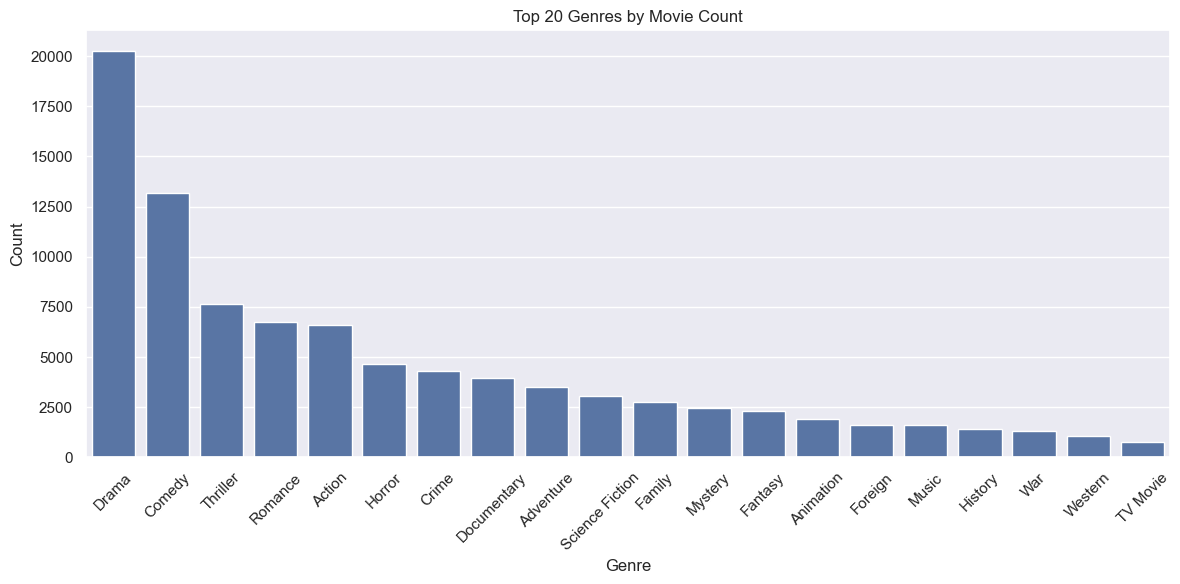

In [614]:
# Each genre appears in its own row
exploded_genres = movies_df.explode('genre_names').reset_index(drop=True)

# Get top 20 genres based on counts
top_20_genres = exploded_genres['genre_names'].value_counts().head(20).index.tolist()

# Create a countplot for only the top 20 genres
plt.figure(figsize=(12, 6))
sns.countplot(data=exploded_genres[exploded_genres['genre_names'].isin(top_20_genres)],
              x='genre_names', order=top_20_genres)
plt.xticks(rotation=45)
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Top 20 Genres by Movie Count")
plt.tight_layout()
output_path = 'pictures/top20genre_visualization.png'
plt.savefig(output_path)
plt.show()

#### 2.2 Processing Collection
Extract and Process the Collection Information

In [616]:
# Convert belongs_to_collection from string to list of dictionaries
# Extract just the collection names
def extract_collection_name(x):
    if pd.isna(x) or x == "" or x == "NaN":
        return ""
    try:
        data = ast.literal_eval(x)
        return data.get("name", "")
    except Exception:
        return ""

# Apply the function on the belongs_to_collection column and create a new feature collection_name
movies_df['collection_name'] = movies_df['belongs_to_collection'].apply(extract_collection_name)
movies_df[['title', 'collection_name']].head(10)

,title,collection_name
0,Toy Story,Toy Story Collection
1,Jumanji,
2,Grumpier Old Men,Grumpy Old Men Collection
3,Waiting to Exhale,
4,Father of the Bride Part II,Father of the Bride Collection
5,Heat,
6,Sabrina,
7,Tom and Huck,
8,Sudden Death,
9,GoldenEye,James Bond Collection


In [617]:
# Create a dummy variable for the collection name to prevent multicolinearity
collection_dummies = pd.get_dummies(movies_df['collection_name'], prefix='collection')

#### 2.3 Textual Features (Overview)
Now, we'll process the overview column using TF-IDF to convert it into numerical vectors.

In [619]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Fill NaN values in 'overview' column with an empty string
movies_df['overview'] = movies_df['overview'].fillna("")

# Initialize TF-IDF vectorizer (use `stop_words='english'` to ignore common words)
tfidf = TfidfVectorizer(stop_words='english')

# Transform the overview text into TF-IDF features
tfidf_matrix = tfidf.fit_transform(movies_df['overview'])

# Convert the result into a DataFrame (optional)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# Display the first few rows of the transformed TF-IDF data
print(tfidf_df.head())

    00  000  000km  000th  001  006  007  008  009  0093  ...  ようなもの  \
0  0.0  0.0    0.0    0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0   
1  0.0  0.0    0.0    0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0   
2  0.0  0.0    0.0    0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0   
3  0.0  0.0    0.0    0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0   
4  0.0  0.0    0.0    0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0   

   患者さんとその世界   水俣  海難1890  見鬼10  주식회사   찾기  첫사랑  ﬁrst  ﬁve  
0        0.0  0.0     0.0   0.0   0.0  0.0  0.0   0.0  0.0  
1        0.0  0.0     0.0   0.0   0.0  0.0  0.0   0.0  0.0  
2        0.0  0.0     0.0   0.0   0.0  0.0  0.0   0.0  0.0  
3        0.0  0.0     0.0   0.0   0.0  0.0  0.0   0.0  0.0  
4        0.0  0.0     0.0   0.0   0.0  0.0  0.0   0.0  0.0  

[5 rows x 75827 columns]


In [620]:
# To chaeck if we worked correctly, we create a list of tags and check to see if they are contained inside the vector
word_list = ["love", "adventure", "mystery"]
for word in word_list:
    if word in tfidf_df.columns:
        print(f"TF-IDF values for '{word}':\n", tfidf_df[word].head())
    else:
        print(f"'{word}' not found in TF-IDF vocabulary.")

TF-IDF values for 'love':
 0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: love, dtype: float64
TF-IDF values for 'adventure':
 0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: adventure, dtype: float64
TF-IDF values for 'mystery':
 0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: mystery, dtype: float64


#### 2.4 Numerical Features (Budget, Revenue, Runtime)
For numerical features like budget, revenue, and runtime, we can normalize them for consistency.

In [622]:
from sklearn.preprocessing import StandardScaler

# Select relevant columns for normalization
numerical_features = ['budget', 'revenue', 'runtime']
numerical_df = movies_df[numerical_features].apply(pd.to_numeric, errors='coerce')

# Replace 0s with the median of the column to avoid zero-impact
numerical_df = numerical_df.replace(0, numerical_df.median())

# Fill any remaining NaN values with the median
numerical_df = numerical_df.fillna(numerical_df.median())

# Normalize the numerical features
scaler = StandardScaler()
normalized_numerical_df = pd.DataFrame(scaler.fit_transform(numerical_df), columns=numerical_df.columns)

# Merge this normalized data back with the movies dataset
movies_df = pd.concat([movies_df, normalized_numerical_df], axis=1)

# Check the updated dataframe
movies_df[['title', 'budget', 'revenue', 'runtime']].head()

,title,budget,budget,revenue,revenue,runtime,runtime
0,Toy Story,30000000,1.479373,373554033.0,5.632841,81.0,-0.482775
1,Jumanji,65000000,3.488165,262797249.0,3.911075,104.0,0.194757
2,Grumpier Old Men,0,-0.242450,0.0,-0.174232,101.0,0.106383
3,Waiting to Exhale,16000000,0.675855,81452156.0,1.091980,127.0,0.872289
4,Father of the Bride Part II,0,-0.242450,76578911.0,1.016224,106.0,0.253673


### Step 3: Similarity Calculation
Now that we have processed the features, we will compute the similarity between movies using the cosine similarity method. We will combine all features (genres, TF-IDF for overviews, and numerical features) into a single vector.

Because of memory issue, we will only compute the cosine similarity for the movie we want to create a recommendation for.

In [625]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix, hstack
from sklearn.decomposition import TruncatedSVD

# STEP 1: Prepare individual feature matrices 

# Convert genres_df (dense) to a sparse matrix.
genres_sparse = csr_matrix(genres_df.values)

# tfidf_matrix is already sparse.

# Convert Normalized Numerical Features (dense) to a sparse matrix.
numerical_sparse = csr_matrix(normalized_numerical_df.values)
# Convert collection_dummies (dense) to a sparse matrix.
collection_sparse = csr_matrix(collection_dummies.values)

# Added weights to the collection data
# This helps to control the recommendation of movies from the same collection
collection_sparse = collection_sparse * 2

print("Genres shape:", genres_sparse.shape)
print("TF-IDF shape:", tfidf_matrix.shape)
print("Numerical features shape:", numerical_sparse.shape)
print("Collection features shape:", collection_sparse.shape)

# If any matrix has a different number of rows, align them:
min_rows = min(genres_sparse.shape[0], tfidf_matrix.shape[0], numerical_sparse.shape[0], collection_sparse.shape[0])
if any(mat.shape[0] != min_rows for mat in [genres_sparse, tfidf_matrix, numerical_sparse, collection_sparse]):
    print(f"Warning: Mismatching rows. Restricting all matrices to the first {min_rows} rows.")
    genres_sparse = genres_sparse[:min_rows]
    tfidf_matrix = tfidf_matrix[:min_rows]
    numerical_sparse = numerical_sparse[:min_rows]
    collection_sparse = collection_sparse[:min_rows]
    movies_df = movies_df.iloc[:min_rows]

# STEP 2: Combine features in a memory-efficient (sparse) way
# Use hstack to horizontally stack the sparse matrices.
combined_features_sparse = hstack([genres_sparse, tfidf_matrix, numerical_sparse, collection_sparse])

# STEP 3: Dimensionality Reduction with TruncatedSVD 
# This reduces the high-dimensional sparse matrix to a manageable dense matrix.
svd = TruncatedSVD(n_components=2000, random_state=42)  # Adjust n_components as needed.
reduced_features = svd.fit_transform(combined_features_sparse)

print("Movies dataframe shape:", movies_df.shape)
print("combined features shape before dimensionality reduction:", combined_features_sparse.shape)
print("Now, reduced_features is a dense matrix with shape:", reduced_features.shape)

Genres shape: (45466, 32)
TF-IDF shape: (45466, 75827)
Numerical features shape: (45466, 3)
Collection features shape: (45466, 1696)
Movies dataframe shape: (45466, 61)
combined features shape before dimensionality reduction: (45466, 77558)
Now, reduced_features is a dense matrix with shape: (45466, 2000)


### Step 4: Movie Recommendation
Now we can use the similarity matrix to recommend movies. For simplicity, let's recommend the top 5 similar movies for a given movie (based on its index).

In [627]:
# Function to compute similarity matrix
def compute_similarity(reduced_features):
    cosine_sim = cosine_similarity(reduced_features, reduced_features)
    return cosine_sim

In [628]:
# Compute similarity matrix
print("Computing similarity matrix...")
cosine_sim = compute_similarity(reduced_features)

Computing similarity matrix...


In [629]:
# Function to get recommendations
def get_recommendations(title, df, cosine_sim, top_n=5):
    title = title.lower()
    # Find the index of the movie that matches the title
    indices = pd.Series(df.index, index=df['title'].str.lower())
    
    if title not in indices:
        closest_titles = df[df['title'].str.contains(title, case=False, na=False)]
        if len(closest_titles) > 0:
            title = closest_titles.iloc[0]['title']
            print(f"Title not found exactly. Using closest match: '{title}'")
        else:
            print(f"No title containing '{title}' found.")
            return pd.DataFrame()
    
    idx = indices[title]
    if isinstance(idx, pd.Series):  # If multiple movies match
        print(f"Multiple movies found for '{title}':")
        for i, index in enumerate(idx):
            movie_info = df.loc[index, ['title', 'release_date']]
            print(f"{i+1}. {movie_info['title']} ({movie_info['release_date']})")
        
        choice = int(input("Enter the number of the movie you meant: ")) - 1
        idx = idx.iloc[choice]

    # Get the pairwise similarity scores for all movies with the target movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the top N most similar movies (excluding the input movie)
    sim_scores = sim_scores[1:top_n+1]
    
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    
    # Create a dataframe with the recommended movies and their similarity scores
    recommendations = df.iloc[movie_indices].copy()
    
    # Add similarity scores to the dataframe
    recommendations['similarity_score'] = [i[1] for i in sim_scores]

    # Return the idx of the input movie also because it is needed in other process
    return idx, recommendations[['title', 'genre_names', 'vote_average', 'release_date', 'similarity_score', 'overview']]

#### Top 5 movie recommendations

In [631]:
# Get recommendations for a sample movie
movie_title = "Star Trek"
print(f"Getting recommendations for '{movie_title}'...")
input_idx, recommendations = get_recommendations(movie_title, movies_df, cosine_sim)

# Print recommendations
print("\nTop Recommendations:")
recommendations

Getting recommendations for 'Star Trek'...

Top Recommendations:


,title,genre_names,vote_average,release_date,similarity_score,overview
20922,Star Trek Into Darkness,"[Action, Adventure, Science Fiction]",7.4,2013-05-05,0.996791,When the crew of the Enterprise is called back...
30557,Star Trek Beyond,"[Action, Adventure, Science Fiction]",6.6,2016-07-07,0.987528,The USS Enterprise crew explores the furthest ...
21123,Pacific Rim,"[Action, Science Fiction, Adventure]",6.7,2013-07-11,0.976847,"When legions of monstrous creatures, known as ..."
44842,Transformers: The Last Knight,"[Action, Science Fiction, Thriller, Adventure]",6.2,2017-06-21,0.968112,"Autobots and Decepticons are at war, with huma..."
21068,Man of Steel,"[Action, Adventure, Fantasy, Science Fiction]",6.5,2013-06-12,0.968109,A young boy learns that he has extraordinary p...


#### Visualize the recommended movies based on their similarity scores

In [633]:
def visualize_recommendations(recommendations, title):
    plt.figure(figsize=(12, 8))
    
    # Create a bar chart of similarity scores
    plt.barh(recommendations['title'], recommendations['similarity_score'], color='skyblue')
    plt.xlabel('Similarity Score')
    plt.ylabel('Movie Title')
    plt.title(f'Movies Similar to "{title}"')
    plt.gca().invert_yaxis()  # Invert y-axis to have the highest similarity at the top
    
    # Save the figure
    plt.tight_layout()
    output_path = 'pictures/recommendation_visualization.png'
    plt.savefig(output_path)
    plt.show()

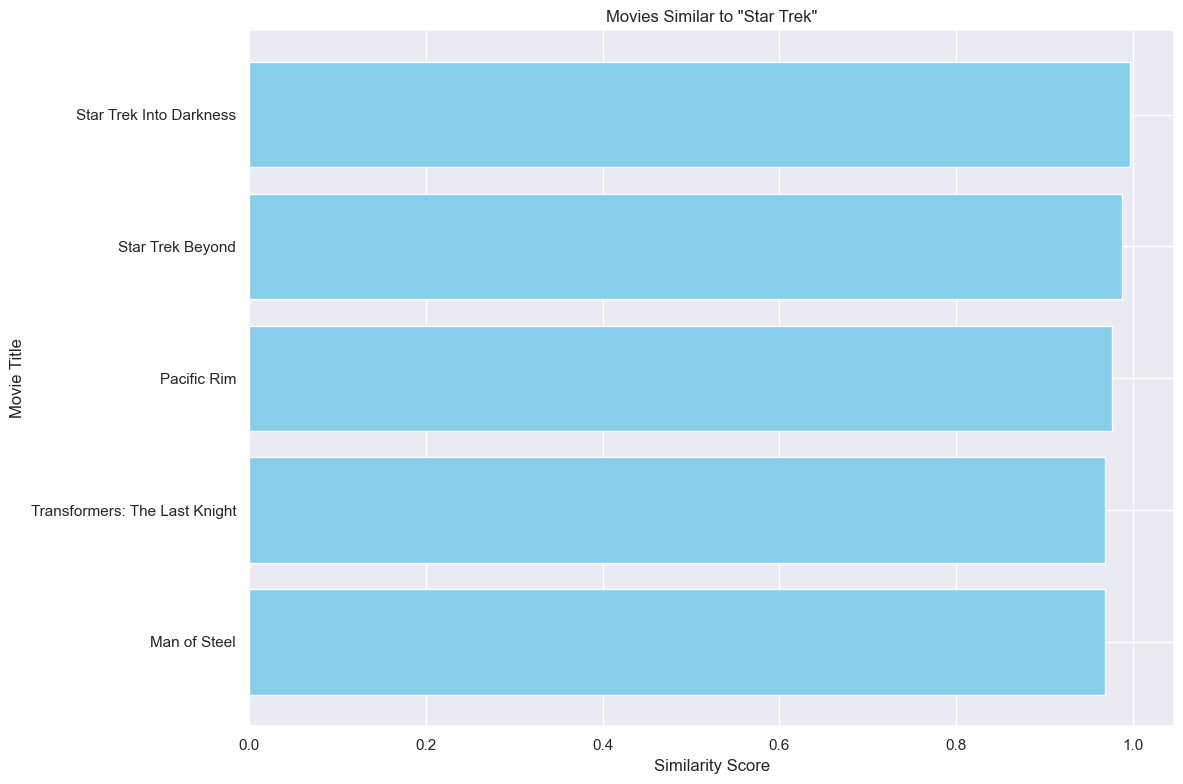

In [634]:
viz_rec = visualize_recommendations(recommendations, movie_title)

#### Wordcloud of the recommended movies based on moview overview

In [636]:
# Function to generate word cloud from recommended movie overviews
def generate_recommended_wordcloud(recommendations):
    combined_overview = ' '.join(recommendations['overview'].tolist())
    wordcloud = WordCloud(width=800, height=500, background_color='white', 
                             max_words=200, contour_width=3, contour_color='steelblue')
    wordcloud.generate(combined_overview)
        
    # Save word cloud
    output_path = 'pictures/wordcloud_visualization.png'
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.savefig(output_path)
    plt.show()

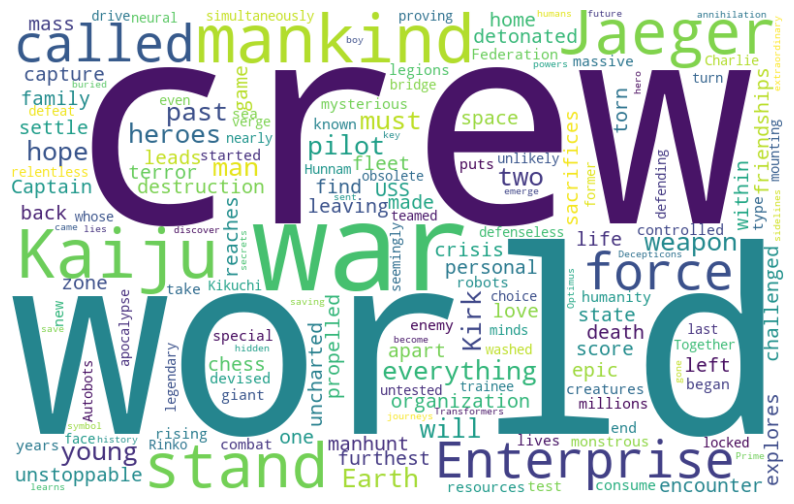

In [637]:
wordcloud = generate_recommended_wordcloud(recommendations)

### Step 5: Evaluate the Model

In [639]:
def evaluate_recommendations(recommendations, input_idx, df):
    #input_idx = df[df['title'].str.lower() == input_movie].index[0]
    '''input_idx is taken from the get_recommendation function
    incase case of multiple movies with same name, it is better to 
    get the index of the movie we already selected recommendation for'''

    input_genres = df.loc[input_idx, 'genre_names']
    
    # Calculate genre overlap
    genre_matches = []
    for _, row in recommendations.iterrows():
        rec_genres = row['genre_names']
        overlap = len(set(input_genres) & set(rec_genres)) / len(set(input_genres) | set(rec_genres)) if set(input_genres) | set(rec_genres) else 0
        genre_matches.append(overlap)
    
    avg_genre_overlap = sum(genre_matches) / len(genre_matches) if genre_matches else 0
    avg_genre_overlap = avg_genre_overlap * 100 # percentage
    
    # Calculate rating similarity
    input_rating = df.loc[input_idx, 'vote_average']
    rating_diffs = []
    for _, row in recommendations.iterrows():
        rec_rating = row['vote_average']
        if pd.notna(rec_rating) and pd.notna(input_rating):
            diff = abs(float(rec_rating) - float(input_rating))
            rating_diffs.append(diff)
    
    avg_rating_diff = sum(rating_diffs) / len(rating_diffs) if rating_diffs else 0

    # Compute Content Relevance using TF-IDF + Cosine Similarity based on the genres
    tfidf = TfidfVectorizer(stop_words='english')
    df['genre_features'] = df['genre_names'].apply(lambda genres: ' '.join(genres) if isinstance(genres, list) else '')
    tfidf_matrix = tfidf.fit_transform(df['genre_features'])

    input_vector = tfidf_matrix[input_idx]
    content_similarities = []

    for _, row in recommendations.iterrows():
        #rec_idx = df[df['title'] == row['title']].index[0]
        #rec_idx = row.name  # Directly use the index from recommendations DataFrame
        rec_idx = df[(df['title'] == row['title']) & (df['release_date'] == row['release_date'])].index[0]
        rec_vector = tfidf_matrix[rec_idx]
        similarity = cosine_similarity(input_vector, rec_vector)[0][0]
        content_similarities.append(similarity)

    avg_content_relevance = sum(content_similarities) / len(content_similarities) if content_similarities else 0
    avg_content_relevance = avg_content_relevance * 100 # percentage
    return {
        'average_genre_overlap': avg_genre_overlap,
        'average_rating_difference': avg_rating_diff,
        'average_content_relevance': avg_content_relevance,
    }

In [640]:
# Evaluate recommendations
eval_metrics = evaluate_recommendations(recommendations, input_idx, movies_df)

# Print evaluation metrics
print(f"\nEvaluation Metrics for {movie_title}:")
for metric, value in eval_metrics.items():
    print(f"{metric}: {value:.2f}")


Evaluation Metrics for Star Trek:
average_genre_overlap: 90.00
average_rating_difference: 0.72
average_content_relevance: 95.95


### Step 6: Interactive Input


Enter a movie title for recommendations (or 'quit' to exit):  the avengers


Multiple movies found for 'the avengers':
1. The Avengers (1998-08-13)
2. The Avengers (2012-04-25)


Enter the number of the movie you meant:  2



Recommendations:
                                title  \
26555    Star Wars: The Force Awakens   
28830                       Furious 7   
20830                      Iron Man 3   
26558         Avengers: Age of Ultron   
17293  Transformers: Dark of the Moon   

                                         genre_names  vote_average  \
26555  [Action, Adventure, Science Fiction, Fantasy]           7.5   
28830                                       [Action]           7.3   
20830           [Action, Adventure, Science Fiction]           6.8   
26558           [Action, Adventure, Science Fiction]           7.3   
17293           [Action, Science Fiction, Adventure]           6.1   

      release_date  similarity_score  \
26555   2015-12-15          0.992015   
28830   2015-04-01          0.991190   
20830   2013-04-18          0.991184   
26558   2015-04-22          0.989316   
17293   2011-06-28          0.988551   

                                                overview  
26555  Thirty 

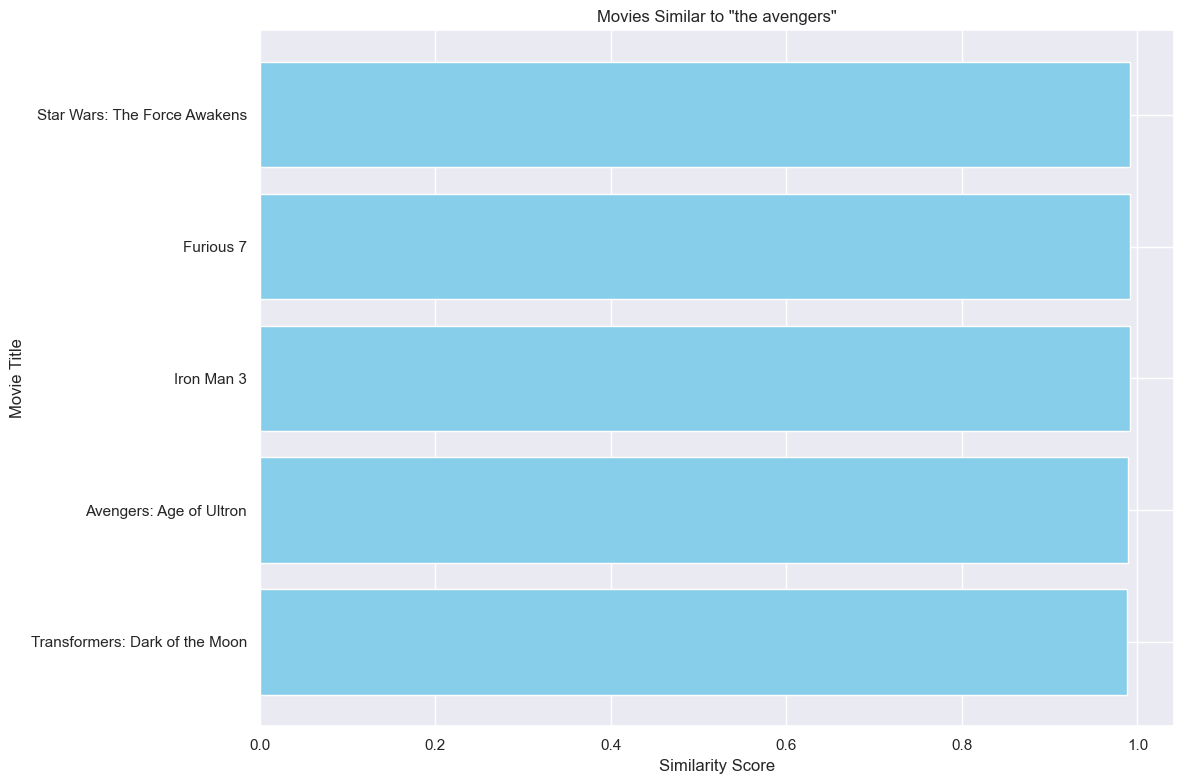

similarity scores visualization saved to picture/recommendation_visualization.png


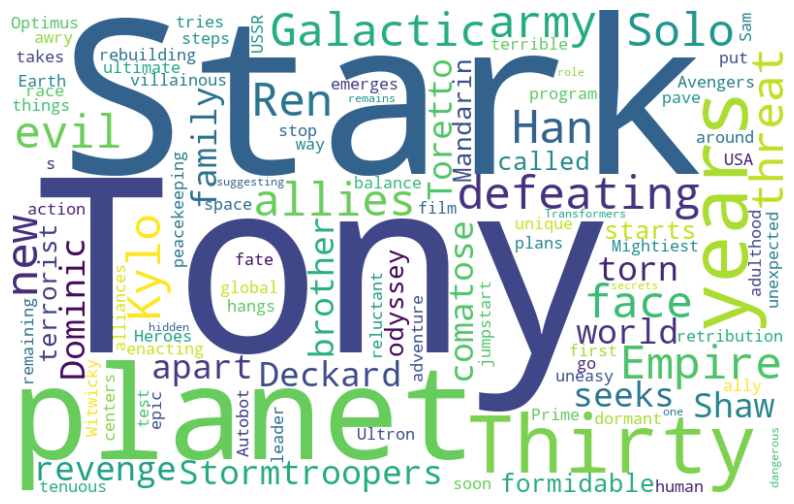


Evaluation Metrics:
average_genre_overlap: 81.67
average_rating_difference: 0.44
average_content_relevance: 85.77



Enter a movie title for recommendations (or 'quit' to exit):  quit


In [503]:
# Interactive mode for user testing
while True:
    user_input = input("\nEnter a movie title for recommendations (or 'quit' to exit): ")
    if user_input.lower() == 'quit':
        break
    
    try:
        input_idx, recommendations = get_recommendations(user_input, movies_df, cosine_sim)
        if not recommendations.empty:
            print("\nRecommendations:")
            print(recommendations)
            visualize_recommendations(recommendations, user_input)
            generate_recommended_wordcloud(recommendations)
            eval_metrics = evaluate_recommendations(recommendations, input_idx, movies_df)

            # Print evaluation metrics
            print(f"\nEvaluation Metrics for {user_input}:")
            for metric, value in eval_metrics.items():
                print(f"{metric}: {value:.2f}")
    except Exception as e:
        print(f"Error: {e}")

### Appendix

In the case of multiple movies with the same name for example "The Avengers"

In [510]:
movies_df[movies_df['title'] == "The Avengers"]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,The Cartel,Thriller,Vision View Entertainment,War,Western,collection_name,budget,revenue,runtime,genre_features
2044,False,NaN,60000000,"[{'id': 53, 'name': 'Thriller'}]",NaN,9320,tt0118661,en,The Avengers,"British Ministry agent John Steed, under direc...",...,0,1,0,0,0,,3.201195,0.581052,-0.247112,Thriller
17818,False,"{'id': 86311, 'name': 'The Avengers Collection...",220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",http://marvel.com/avengers_movie/,24428,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,...,0,0,0,0,0,The Avengers Collection,12.384248,23.448010,1.343615,Science Fiction Action Adventure


This was properly delt with in the get_recommendation function. A prompt is expected to pop up to ask the user to select with of the multiple movie is the choice for recommendation. 

I also effected this is the evaluation metrics to evaluate based on the selected movie choice